# Wildfire Summary Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/ABWildfires_1961-2019.csv')

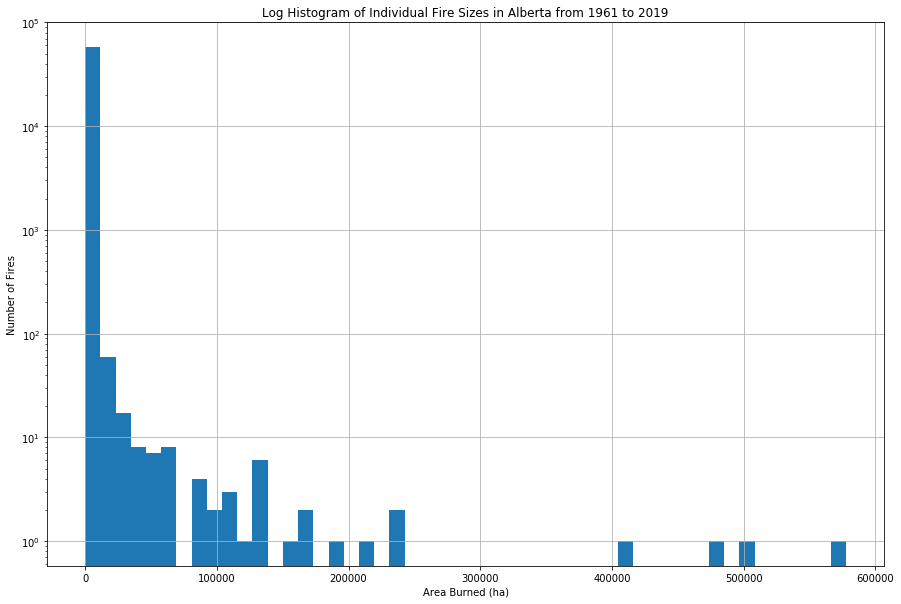

In [3]:
fig, ax = plt.subplots()

df['Area'].hist(ax=ax, bins=50, bottom=0, figsize=(15,10))

ax.set(xlabel='Area Burned (ha)',
       ylabel='Number of Fires',
       title='Log Histogram of Individual Fire Sizes in Alberta from 1961 to 2019')
ax.set_yscale('log')
plt.savefig('img/loghistABWildfires_1961-2019.png')
plt.show()